In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as const
import math
from scipy.optimize import curve_fit
import pyreadstat

[1.84601913e-10 3.13308992e+01]


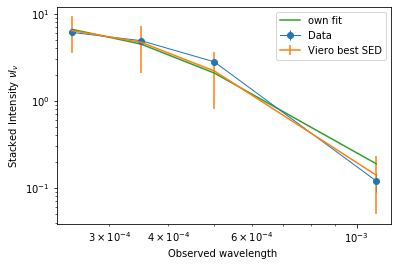

In [2]:
## loading up the data

c = const.c
k = const.k
h = const.h


def mod_BB_curve_with_z(v, A, T, z):
    beta = 2.
    v0 = v*(1+z)
    Bv = (2*h*v0**3/c**2)*(1/(np.exp(h*v0/(k*T))-1))
    Sv = A*v0**beta*Bv
    return Sv

### data pulled from Viero et al ###
bands = np.asarray([250., 350., 500., 1100.])*1.e-6 #in m
freqs = c/bands

#for the logM = 10.0-10.5 data
stacked_flux = np.asarray([ 6.1, 4.9, 2.8, 0.12]) #in units nW/m^2/sr
stacked_flux_err = np.asarray([ 0.6, 0.5, 0.3, 0.03]) #same units as above
#SED fits
SED_flux = np.asarray([ 6.4, 4.7, 2.2, 0.14])
SED_flux_err = np.asarray([ 2.9, 2.6, 1.4, 0.09])

# #for the logM = 10.5-11.0
# stacked_flux = np.asarray([0.47,0.72,1.9, 2.4, 2.0, 1.4, 0.63, 0.027]) #in units nW/m^2/sr
# stacked_flux_err = np.asarray([0.01, 0.07, 0.1, 0.2, 0.1, 0.1,0.03,0.002]) #same units as above
# #SED fits
# SED_flux = np.asarray([0.48,1.2, 1.6, 2.5, 2.5, 1.5, 0.61, 0.031])
# SED_flux_err = np.asarray([0.2,0.07,0.7,1.1,0.1,0.6,0.24,0.012])

#popt, pcov = curve_fit(mod_BB_curve_with_z, freqs, SED_flux, sigma = SED_flux_err, p0 = [1.e-11,1.e20, 1., 70.], bounds = ([0, 0, 0.2, 0], [10., 1.e40, 2, 100]))
z = 1.4
popt, pcov = curve_fit(lambda p1, p2, p3: mod_BB_curve_with_z(p1, p2, p3, z), freqs, stacked_flux, \
                       sigma = stacked_flux_err, p0 = [1.e-10, 30.], \
                       maxfev=10000)
#                       bounds = ([0, 0], [1., 100]))
amp = popt[0]
#fit_z = popt[1]
temp = popt[1]
plt.errorbar(bands, stacked_flux, stacked_flux_err,marker = 'o',lw=1,label='Data')
plt.errorbar(bands, SED_flux, SED_flux_err, label='Viero best SED')
plt.semilogx()
plt.semilogy()
plt.ylabel(r'Stacked Intensity $\nu I_\nu$')
plt.xlabel(r'Observed wavelength ')
plt.plot(bands, mod_BB_curve_with_z(freqs, popt[0], popt[1], z), label='own fit')

#plt.ylim(0.001,100)
plt.legend()
print (popt)

/Users/amytang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


[1.e-10 1.e+00 7.e+01]


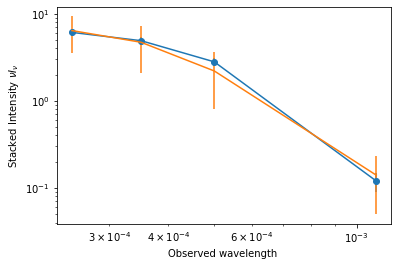

In [3]:
## loading up the data

c = const.c
k = const.k
h = const.h


### data pulled from Viero et al ###
bands = np.asarray([250., 350., 500., 1100.])*1.e-6 #in m
freqs = c/bands
stacked_flux = np.asarray([ 6.1, 4.9, 2.8, 0.12]) #in units nW/m^2/sr
stacked_flux_err = np.asarray([0.6, 0.5, 0.3, 0.03]) #same units as above

#SED fits
SED_flux = np.asarray([ 6.4, 4.7, 2.2, 0.14])
SED_flux_err = np.asarray([ 2.9, 2.6, 1.4, 0.09])

plt.errorbar(bands, stacked_flux, stacked_flux_err,marker = 'o')
plt.errorbar(bands, SED_flux, SED_flux_err)
plt.semilogx()
plt.semilogy()
plt.ylabel(r'Stacked Intensity $\nu I_\nu$')
plt.xlabel(r'Observed wavelength ')

popt, pcov = curve_fit(mod_BB_curve_with_z, freqs, stacked_flux, sigma = stacked_flux_err, p0 = [1.e-11, 1., 70.], bounds = ([0, 0.2, 0], [10., 2, 100]))

plt.plot(bands, mod_BB_curve_with_z(freqs, popt[0], popt[1], popt[2]))
#plt.ylim(0.001,100)
print (popt)

15


Text(0.5, 1.0, 'Rebinned, X & Y are pixel units (15")')

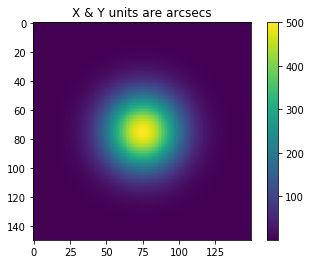

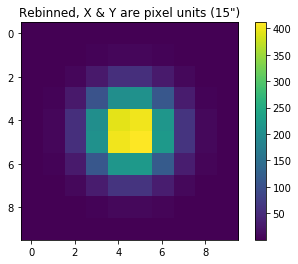

In [4]:
size = 150
fwhm_beam = 18.2 #arcsecs
sigma_x,sigma_y = fwhm_beam, fwhm_beam
A = 500
x = np.array([np.arange(size)]) - size/2
y = np.transpose(np.array([np.arange(size)])) - size /2
psf  = A *np.exp(-(x**2/(2*sigma_x**2) + y**2/(2*sigma_y**2)))
plt.title('X & Y units are arcsecs')
plt.imshow(psf)
plt.colorbar()

#rebin 
small = int(size/15)
print (psf.shape[0]//small)
bin_psf = psf.reshape((small,psf.shape[0]//small, small,psf.shape[0]//small)).mean(axis=3).mean(1)
plt.figure()
plt.imshow(bin_psf)
plt.colorbar()
plt.title('Rebinned, X & Y are pixel units (15")')

[ 2.05573175e-01  1.14364275e+11 -2.07195635e+00]


/Users/amytang/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


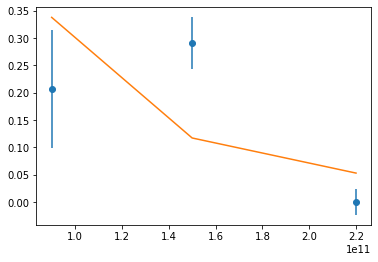

In [5]:

def spec_fit(x, A, f0, alpha):
	return A*(x/f0)**alpha

from scipy.optimize import curve_fit


freqs = np.array([90.e9, 150.e9, 220.e9])
ymed = np.asarray([ 0.20596054,  0.29023269,  0.        ])
yerr = np.asarray([ 0.10792972,  0.04768894,  0.02347652])
popt, pcov = curve_fit(spec_fit, freqs, ymed, sigma = yerr, p0 = [2.e-1, 1.e11, -2.5], bounds=((0, 0, -3), (np.inf, np.inf, -1)),maxfev=10000)
print (popt)
plt.errorbar(freqs, ymed, yerr=yerr, fmt='o', label='median flux')
plt.plot(freqs, spec_fit(freqs, popt[0], popt[1], popt[2]))

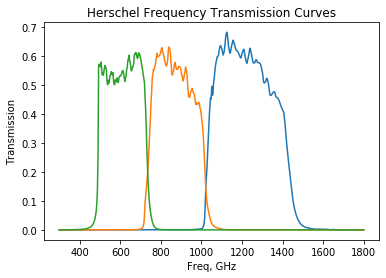

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [6]:
def mod_BB_curve_with_z(v, A, T, z):
    beta = 2.
    v0 = v*(1+z)
    Bv = (2*h*v0**3/c**2)*(1/(np.exp(h*v0/(k*T))-1))
    Sv = A*v0**beta*Bv
    return Sv


import astropy.io.fits as fits

hdu = fits.open('SPIRE_phot_RSRF_14_3.fits')
freq = hdu[1].data['frequency']
wavenumber = hdu[1].data['wavenumber']
psw = hdu[1].data['psw']
pmw = hdu[1].data['pmw']
plw = hdu[1].data['plw']

plt.plot(freq, psw)
plt.plot(freq,pmw)
plt.plot(freq, plw)
plt.xlabel('Freq, GHz')
plt.ylabel('Transmission')
plt.title('Herschel Frequency Transmission Curves')
plt.savefig('20200414_herschel_freq_trans.png')

import scipy.constants as const
from scipy.interpolate import interp1d
from scipy import integrate

c = const.c
k = const.k
h = const.h

def dbdt(f,T):#      #t in K, f in Hz; returns SI units
    x = h*f/(k*T)
    return (2*h*f**3/c**2) / (np.exp(x)-1.0)**2 * (x/T) * np.exp(x)

def dcmbrdt(f):
    return dbdt(f, 2.726)
plt.figure()
colors=['red','blue']

def calc_nu_eff1(nu, transmission, source_spectrum, nonusq=True):
    nu_interp = np.arange(1e4)/1e4*(np.max(nu)-np.min(nu)+20.) + np.min(nu) - 10.

    dbdt = dcmbrdt(nu*1.e9)

    if nonusq:
        bw_source = integrate.simps(transmission*source_spectrum,nu)
        bw_cmb = integrate.simps(transmission*dbdt,nu)
    else:
        bw_source = integrate.simps(transmission*source_spectrum/nu**2,nu)
        bw_cmb = integrate.simps(transmission*dbdt/nu**2,nu)
    f = interp1d(nu, source_spectrum,fill_value="extrapolate")
    ss_interp = f(nu_interp)
    dbdt_interp = dcmbrdt(nu_interp*1e9)
    whlow = np.where(nu_interp <= 40.)[0]
    if np.any(nu_interp<= 40.) == True:
        dbdt_interp[whlow] = 1e12
    ratio1 = bw_source/bw_cmb
    ratio2 = ss_interp/dbdt_interp
    dss = np.abs(ratio1-ratio2)
    from scipy.signal import argrelmin
    minima_ind = argrelmin(np.log(dss),order=10)[0]
    if len(minima_ind) > 1:
        band_start = np.min(nu[transmission>0.2])
        band_end = np.max(nu[transmission>0.2])
        band_cent = (band_start+band_end)/2.
        true_min = np.where(np.abs(band_cent-nu_interp[minima_ind]) == np.min(np.abs(band_cent-nu_interp[minima_ind])))[0][0]
        nu_eff = nu_interp[minima_ind[true_min]]
    else:
        nu_eff = nu_interp[minima_ind]
    return nu_eff


freq = np.concatenate((np.linspace(np.min(freq)-200,np.min(freq)-1, 99), freq))
trans = np.asarray([plw,pmw,psw])
trans = np.hstack((np.zeros((3,99)),trans))
wavelength = c/(freq*1.e9)
plt.figure()
z_set = np.arange(0.01,3,0.01)
T_set = np.arange(3,50,0.1)
eff_bands_250=np.zeros((len(z_set), len(T_set)))
eff_bands_350=np.zeros((len(z_set), len(T_set)))
eff_bands_500=np.zeros((len(z_set), len(T_set)))
for m in range(len(z_set)):
    for n in range(len(T_set)):
        eff_bands_500[m,n] = calc_nu_eff1(freq, trans[0],mod_BB_curve_with_z(wavelength,1, T_set[n], z_set[m]))
        eff_bands_350[m,n] = calc_nu_eff1(freq, trans[1],mod_BB_curve_with_z(wavelength,1, T_set[n], z_set[m]))
        eff_bands_250[m,n] = calc_nu_eff1(freq, trans[2],mod_BB_curve_with_z(wavelength,1, T_set[n], z_set[m]))


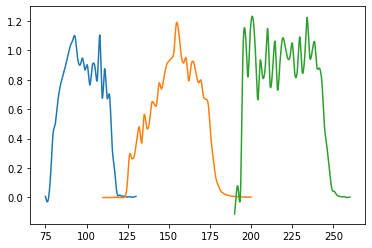

<Figure size 432x288 with 0 Axes>

In [3]:
def mod_BB_curve_with_z(v, A, T, z):
    beta = 2.
    v0 = v*(1+z)
    Bv = (2*h*v0**3/c**2)*(1/(np.exp(h*v0/(k*T))-1))
    Sv = A*v0**beta*Bv
    return Sv

import scipy.constants as const
from scipy.interpolate import interp1d
from scipy import integrate

c = const.c
k = const.k
h = const.h

def dbdt(f,T):#      #t in K, f in Hz; returns SI units
    x = h*f/(k*T)
    return (2*h*f**3/c**2) / (np.exp(x)-1.0)**2 * (x/T) * np.exp(x)

def dcmbrdt(f):
    return dbdt(f, 2.726)

def calc_nu_eff1(nu, transmission, source_spectrum, nonusq=True):
    nu_interp = np.arange(1e4)/1e4*(np.max(nu)-np.min(nu)+20.) + np.min(nu) - 10.

    dbdt = dcmbrdt(nu*1.e9)

    if nonusq:
        bw_source = integrate.simps(transmission*source_spectrum,nu)
        bw_cmb = integrate.simps(transmission*dbdt,nu)
    else:
        bw_source = integrate.simps(transmission*source_spectrum/nu**2,nu)
        bw_cmb = integrate.simps(transmission*dbdt/nu**2,nu)
    f = interp1d(nu, source_spectrum,fill_value="extrapolate")
    ss_interp = f(nu_interp)
    dbdt_interp = dcmbrdt(nu_interp*1e9)
    whlow = np.where(nu_interp <= 40.)[0]
    if np.any(nu_interp<= 40.) == True:
        dbdt_interp[whlow] = 1e12
    ratio1 = bw_source/bw_cmb
    ratio2 = ss_interp/dbdt_interp
    dss = np.abs(ratio1-ratio2)
    from scipy.signal import argrelmin
    minima_ind = argrelmin(np.log(dss),order=10)[0]
    if len(minima_ind) > 1:
        band_start = np.min(nu[transmission>0.2])
        band_end = np.max(nu[transmission>0.2])
        band_cent = (band_start+band_end)/2.
        true_min = np.where(np.abs(band_cent-nu_interp[minima_ind]) == np.min(np.abs(band_cent-nu_interp[minima_ind])))[0][0]
        nu_eff = nu_interp[minima_ind[true_min]]
    else:
        nu_eff = nu_interp[minima_ind]
    return nu_eff

import astropy.io.fits as fits

spt90 = np.loadtxt('spt_95.txt')
spt150 = np.loadtxt('spt_150.txt')
spt220 = np.loadtxt('spt_220.txt')
data = np.asarray([spt90, spt150, spt220])
freq90 = data[0][:,0]
trans90 = data[0][:,1]
freq150 = data[1][:,0]
trans150 = data[1][:,1]
freq220 = data[2][:,0]
trans220 = data[2][:,1]

plt.figure()
plt.plot(freq90,trans90)
plt.plot(freq150,trans150)
plt.plot(freq220,trans220)

freq90 = np.concatenate((np.linspace(np.min(freq90)-200,np.min(freq90)-1, 99), freq90))
freq150 = np.concatenate((np.linspace(np.min(freq150)-200,np.min(freq150)-1, 99), freq150))
freq220 = np.concatenate((np.linspace(np.min(freq220)-200,np.min(freq220)-1, 99), freq220))

trans90 = np.hstack((np.zeros((99)),trans90))
trans150 = np.hstack((np.zeros((99)),trans150))
trans220 = np.hstack((np.zeros((99)),trans220))

wavelength90 = c/(freq90*1.e9)
wavelength150 = c/(freq150*1.e9)
wavelength220 = c/(freq220*1.e9)

plt.figure()
z_set = np.arange(0.01,3,0.01)
T_set = np.arange(3,50,0.1)

eff_bands_90=np.zeros((len(z_set), len(T_set)))
eff_bands_150=np.zeros((len(z_set), len(T_set)))
eff_bands_220=np.zeros((len(z_set), len(T_set)))

for m in range(len(z_set)):
    for n in range(len(T_set)):
        eff_bands_90[m,n] = calc_nu_eff1(freq90, trans90,mod_BB_curve_with_z(wavelength90,1, z_set[m], T_set[n]))
        eff_bands_150[m,n] = calc_nu_eff1(freq150, trans150,mod_BB_curve_with_z(wavelength150,1, z_set[m], T_set[n]))
        eff_bands_220[m,n] = calc_nu_eff1(freq220, trans220,mod_BB_curve_with_z(wavelength220,1, z_set[m], T_set[n]))


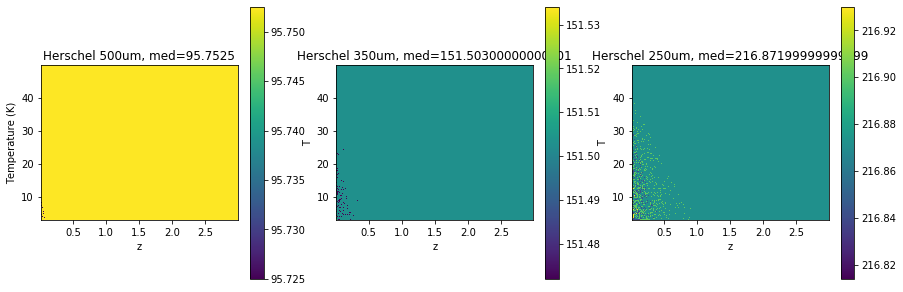

In [6]:
from scipy import stats
plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
im = ax.imshow(eff_bands_90,extent=[z_set[0], z_set[-1], T_set[0], T_set[-1]])
plt.colorbar(im, ax=ax)
ax.set_aspect(0.05)
ax.set_ylabel('Temperature (K)')
ax.set_xlabel('z')
ax.set_title('Herschel 500um, med=' + str(np.median(eff_bands_90)))
ax = plt.subplot(1,3,2)
im = ax.imshow(eff_bands_150,extent=[z_set[0], z_set[-1], T_set[0], T_set[-1]])
plt.colorbar(im, ax=ax)
ax.set_aspect(0.05)
ax.set_ylabel('T')
ax.set_xlabel('z')
ax.set_title('Herschel 350um, med=' + str(np.median(eff_bands_150)))
ax = plt.subplot(1,3,3)
im = ax.imshow(eff_bands_220,extent=[z_set[0], z_set[-1], T_set[0], T_set[-1]])
plt.colorbar(im, ax=ax)
ax.set_aspect(0.05)
ax.set_ylabel('T')
ax.set_xlabel('z')
ax.set_title('Herschel 250um, med=' + str(np.median(eff_bands_220)))
plt.savefig('20200414_Herschel_effective_bands.png')

In [7]:
look_up_table = np.zeros((len(z_set)+1, len(T_set)+1,3))
look_up_table[1:,0,0] = z_set
look_up_table[1:,0,1] = z_set
look_up_table[1:,0,2] = z_set
look_up_table[0,1:,0] = T_set
look_up_table[0,1:,1] = T_set
look_up_table[0,1:,2] = T_set
look_up_table[1:,1:,0] = eff_bands_90
look_up_table[1:,1:,1] = eff_bands_150
look_up_table[1:,1:,2] = eff_bands_220

np.save('SPTSZ_effective_bands.npy', look_up_table)

In [16]:
spt90 = np.loadtxt('spt_95.txt')
spt150 = np.loadtxt('spt_150.txt')
spt220 = np.loadtxt('spt_220.txt')
data = np.asarray([spt90, spt150, spt220])
freq90 = data[0][:,0]
trans90 = data[0][:,1]
freq150 = data[1][:,0]
trans150 = data[1][:,1]
freq220 = data[2][:,0]
trans220 = data[2][:,1]
wavelength90 = c/(freq90*1.e9)
wavelength150 = c/(freq150*1.e9)
wavelength220 = c/(freq220*1.e9)




# z_set = np.arange(0.2,2.2,0.2)
# T_set = np.arange(5., 45., 1.)
# eff_bands_90=np.zeros((len(z_set), len(T_set)))
# eff_bands_150=np.zeros((len(z_set), len(T_set)))
# eff_bands_220=np.zeros((len(z_set), len(T_set)))

# for m in range(len(z_set)):
#     for n in range(len(T_set)):
#         eff_bands_90[m,n] = calc_nu_eff(freq90, trans90,mod_BB_curve_with_z(wavelength90,1, z_set[m], T_set[n]))
#         eff_bands_150[m,n] = calc_nu_eff(freq150, trans150,mod_BB_curve_with_z(wavelength150,1, z_set[m], T_set[n]))
#         eff_bands_220[m,n] = calc_nu_eff(freq220, trans220,mod_BB_curve_with_z(wavelength220,1, z_set[m], T_set[n]))

[95.75]


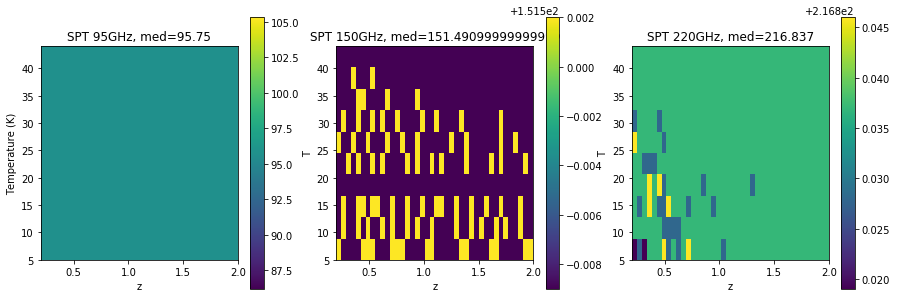

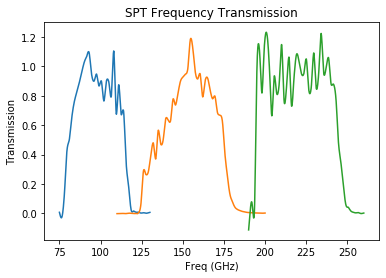

In [53]:
from scipy import stats
print (stats.mode(eff_bands_90.flatten())[0])
plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
im = ax.imshow(eff_bands_90,extent=[z_set[0], z_set[-1], T_set[0], T_set[-1]])
plt.colorbar(im, ax=ax)
ax.set_aspect(0.05)
ax.set_ylabel('Temperature (K)')
ax.set_xlabel('z')
ax.set_title('SPT 95GHz, med=' + str(np.median(eff_bands_90)))
ax = plt.subplot(1,3,2)
im = ax.imshow(eff_bands_150,extent=[z_set[0], z_set[-1], T_set[0], T_set[-1]])
plt.colorbar(im, ax=ax)
ax.set_aspect(0.05)
ax.set_ylabel('T')
ax.set_xlabel('z')
ax.set_title('SPT 150GHz, med=' + str(np.median(eff_bands_150)))
ax = plt.subplot(1,3,3)
im = ax.imshow(eff_bands_220,extent=[z_set[0], z_set[-1], T_set[0], T_set[-1]])
plt.colorbar(im, ax=ax)
ax.set_aspect(0.05)
ax.set_ylabel('T')
ax.set_xlabel('z')
ax.set_title('SPT 220GHz, med=' + str(np.median(eff_bands_220)))
plt.savefig('20200414_SPT_effective_bands.png')

plt.figure()
plt.plot(freq90,trans90)
plt.plot(freq150,trans150)
plt.plot(freq220, trans220)
plt.xlabel('Freq (GHz)')
plt.ylabel('Transmission')
plt.title('SPT Frequency Transmission')
plt.savefig('20200414_SPT_freq_trans.png')

<b>chi2 for various temperatures and blackbodies</b>

[97.4225] [153.011] 215.712
[99.974] [156.462] [221.616]


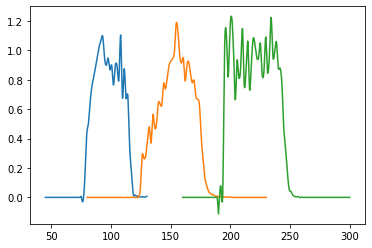

In [19]:
## checking SPT bands for Christian's values:

def spectrum(x, alpha):
    return x**alpha

freq90_1 = np.concatenate((np.linspace(np.min(freq90)-30,np.min(freq90)-1, 49), freq90))
trans90_1 = np.concatenate((np.zeros(49), trans90))


freq150_1 = np.concatenate((np.linspace(np.min(freq150)-30, np.min(freq150)-1, 49), freq150, \
                            np.linspace(np.max(freq150)+1, np.max(freq150)+30, 49)))
trans150_1 = np.concatenate((np.zeros(49), trans150, np.zeros(49)))

freq220_1 = np.concatenate((np.linspace(np.min(freq220)-30, np.min(freq220)-1, 49), freq220, \
                            np.linspace(np.max(freq220)+1, np.max(freq220)+40, 49)))
trans220_1 = np.concatenate((np.zeros(49), trans220, np.zeros(49)))

plt.plot(freq90_1,trans90_1)
plt.plot(freq150_1,trans150_1)
plt.plot(freq220_1,trans220_1)


alpha = -0.5
eff_90 = calc_nu_eff1(freq90_1, trans90_1,spectrum(freq90_1*1.e9, alpha))
eff_150 = calc_nu_eff1(freq150_1, trans150_1,spectrum(freq150_1*1.e9, alpha))
eff_220 = calc_nu_eff1(freq220_1, trans220_1,spectrum(freq220_1*1.e9, alpha))
print (eff_90, eff_150, eff_220)

alpha = 3.5
eff_90 = calc_nu_eff1(freq90_1, trans90_1,spectrum(freq90_1*1.e9, alpha))
eff_150 = calc_nu_eff1(freq150_1, trans150_1,spectrum(freq150_1*1.e9, alpha))
eff_220 = calc_nu_eff1(freq220_1, trans220_1,spectrum(freq220_1*1.e9, alpha))
print (eff_90, eff_150, eff_220)

#plt.semilogy()

In [62]:
spt90 = np.loadtxt('spt_95.txt')
spt150 = np.loadtxt('spt_150.txt')
spt220 = np.loadtxt('spt_220.txt')
data = np.asarray([spt90, spt150, spt220])
freq90 = data[0][:,0]
trans90 = data[0][:,1]
freq150 = data[1][:,0]
trans150 = data[1][:,1]
freq220 = data[2][:,0]
trans220 = data[2][:,1]

In [20]:
import pickle as pk
from scipy.interpolate import UnivariateSpline
from scipy.integrate import quad
import numpy as np
from scipy.optimize import fsolve

Tcmb = 2.725
# g_nu is the relative of tSZ to TCMB at each frequency
def g_nu(freq):
    x = 6.626e-34 * freq * 1e9 / (1.381e-23 * Tcmb)
    g_nu = x * 1.0 / np.tanh(x / 2.0) - 4
    return g_nu

def dB_dT(freq):
    # derivative of blackbody spectrum wrt T at Tcmb
    f = freq * 1e9 # assume input freq in GHz
    h = 6.626e-34
    k = 1.381e-23
    Tcmb = 2.725
    c = 299792458
    exp_fac = np.exp(h * f / k / Tcmb)
    return 2 * h**2 * f**4 / k / Tcmb**2 / c**2 * exp_fac / (exp_fac - 1)**2

# load up the detector frequency bands
# they are stored with the detector A Omega and Lyot stop 

band90_f = UnivariateSpline(freq90_1, trans90_1, s=0)
band150_f = UnivariateSpline(freq150_1, trans150_1, s=0)
band220_f = UnivariateSpline(freq220_1, trans220_1, s=0)

def f_dust(freq):
    freq = freq * 1e9
    return freq ** 3.5

def f_radio(freq):
    freq = freq * 1e9
    return freq ** -0.5

def f_tsz(freq):
    freq = freq # no need to convert to Hz here
    return dB_dT(freq) * g_nu(freq)

def dB_dT_over_f_dust(freq, *ratio):
    return dB_dT(freq) / f_dust(freq) - ratio

def dB_dT_over_f_radio(freq, *ratio):
    return dB_dT(freq) / f_radio(freq) - ratio

def dB_dT_over_f_tsz(freq, *ratio):
    return dB_dT(freq) / f_tsz(freq) - ratio

# for 90ghz

ratio_dust_90 = quad(lambda freq: dB_dT(freq)*band90_f(freq), 66.03, 124.07)[0]/ quad(lambda freq: f_dust(freq)*band90_f(freq), 66.03, 124.07)[0]
print (ratio_dust_90)
f_eff_dust_90 = fsolve(dB_dT_over_f_dust, 90, args = ratio_dust_90)[0]

ratio_radio_90 = quad(lambda freq: dB_dT(freq)*band90_f(freq), 66.03, 124.07)[0]/ quad(lambda freq: f_radio(freq)*band90_f(freq), 66.03, 124.07)[0]
f_eff_radio_90 = fsolve(dB_dT_over_f_radio, 90, args = ratio_radio_90)[0]

ratio_tsz_90 = quad(lambda freq: dB_dT(freq)*band90_f(freq), 66.03, 124.07)[0]/ quad(lambda freq: f_tsz(freq)*band90_f(freq), 66.03, 124.07)[0]
f_eff_tsz_90 = fsolve(dB_dT_over_f_tsz, 90, args = ratio_tsz_90)[0]

# for 150ghz                                                        
ratio_dust_150 = quad(lambda freq: dB_dT(freq)*band150_f(freq), 106.06, 198.11, limit=100)[0]/ quad(lambda freq: f_dust(freq)*band150_f(freq), 106.06, 198.11, limit=100)[0]
f_eff_dust_150 = fsolve(dB_dT_over_f_dust, 150, args = ratio_dust_150)[0]

ratio_radio_150 = quad(lambda freq: dB_dT(freq)*band150_f(freq), 106.06, 198.11, limit=100)[0]/ quad(lambda freq: f_radio(freq)*band150_f(freq), 106.06, 198.11, limit=100)[0]
f_eff_radio_150 = fsolve(dB_dT_over_f_radio, 150, args = ratio_radio_150)[0]

ratio_tsz_150 = quad(lambda freq: dB_dT(freq)*band150_f(freq), 106.06, 198.11, limit=100)[0]/ quad(lambda freq: f_tsz(freq)*band150_f(freq), 106.06, 198.11, limit=100)[0]
f_eff_tsz_150 = fsolve(dB_dT_over_f_tsz, 150, args = ratio_tsz_150)[0]

# for 220ghz                                                        
ratio_dust_220 = quad(lambda freq: dB_dT(freq)*band220_f(freq), 160.09, 298.17, limit=100)[0]/ quad(lambda freq: f_dust(freq)*band220_f(freq), 160.09, 298.17, limit=100)[0]
f_eff_dust_220 = fsolve(dB_dT_over_f_dust, 220, args = ratio_dust_220)[0]

ratio_radio_220 = quad(lambda freq: dB_dT(freq)*band220_f(freq), 160.09, 298.17, limit=100)[0]/ quad(lambda freq: f_radio(freq)*band220_f(freq), 160.09, 298.17, limit=100)[0]
f_eff_radio_220 = fsolve(dB_dT_over_f_radio, 220, args = ratio_radio_220)[0]

ratio_tsz_220 = quad(lambda freq: dB_dT(freq)*band220_f(freq), 160.09, 298.17, limit=100)[0]/ quad(lambda freq: f_tsz(freq)*band220_f(freq), 160.09, 298.17, limit=100)[0]
f_eff_tsz_220 = fsolve(dB_dT_over_f_tsz, 220, args = ratio_tsz_220)[0]

print('Dusty source band center for 90, 150, and 220GHz bands are, %.3f, %.3f, %.3f' %(f_eff_dust_90, f_eff_dust_150, f_eff_dust_220))
print('Radio source band center for 90, 150, and 220GHz bands are, %.3f, %.3f, %.3f' %(f_eff_radio_90, f_eff_radio_150, f_eff_radio_220))
print('tSZ band center for 90, 150, and 220GHz bands are, %.3f, %.3f, %.3f' %(f_eff_tsz_90, f_eff_tsz_150, f_eff_tsz_220))

# Christian's effective frequencies
f_eff_dust_sz = np.array([96.9, 153.4, 221.6])
f_eff_radio_sz = np.array([93.5, 149.5, 215.8])
f_eff_tsz_sz = np.array([96.6, 152.3, 220.1])

/Users/amytang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
/Users/amytang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integ

7.541039824468797e-57
Dusty source band center for 90, 150, and 220GHz bands are, 100.083, 156.776, 219.766
Radio source band center for 90, 150, and 220GHz bands are, 97.272, 152.415, 232.079
tSZ band center for 90, 150, and 220GHz bands are, 99.614, 155.157, 219.341


/Users/amytang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


In [60]:
bands = pk.load(open('/Users/amytang/Downloads/2019_corrected_fts_spectra.pkl', 'rb'))
Tcmb = 2.725
# g_nu is the relative of tSZ to TCMB at each frequency
def g_nu(freq):
    x = 6.626e-34 * freq * 1e9 / (1.381e-23 * Tcmb)
    g_nu = x * 1.0 / np.tanh(x / 2.0) - 4
    return g_nu
def dB_dT(freq):
    # derivative of blackbody spectrum wrt T at Tcmb
    f = freq * 1e9 # assume input freq in GHz
    h = 6.626e-34
    k = 1.381e-23
    Tcmb = 2.725
    c = 299792458
    exp_fac = np.exp(h * f / k / Tcmb)
    return 2 * h**2 * f**4 / k / Tcmb**2 / c**2 * exp_fac / (exp_fac - 1)**2
# load up the detector frequency bands
# they are stored with the detector A Omega and Lyot stop 
freq90 = bands['bolo_average']['90']['freq']
band90 = bands['bolo_average']['90']['spectrum']
freq150 = bands['bolo_average']['150']['freq']
band150 = bands['bolo_average']['150']['spectrum']
freq220 = bands['bolo_average']['220']['freq']
band220 = bands['bolo_average']['220']['spectrum']


band90_f = UnivariateSpline(freq90, band90, s=0)
band150_f = UnivariateSpline(freq150, band150, s=0)
band220_f = UnivariateSpline(freq220, band220, s=0)

def f_dust(freq):
    freq = freq * 1e9
    return freq ** 3.5

def f_radio(freq):
    freq = freq * 1e9
    return freq ** -0.5

def f_tsz(freq):
    freq = freq # no need to convert to Hz here
    return dB_dT(freq) * g_nu(freq)

def dB_dT_over_f_dust(freq, *ratio):
    return dB_dT(freq) / f_dust(freq) - ratio

def dB_dT_over_f_radio(freq, *ratio):
    return dB_dT(freq) / f_radio(freq) - ratio

def dB_dT_over_f_tsz(freq, *ratio):
    return dB_dT(freq) / f_tsz(freq) - ratio

spt3g= (f_dust(freq)*band90_f(freq))
# for 90ghz

ratio_dust_90 = quad(lambda freq: dB_dT(freq)*band90_f(freq), 66.03, 124.07)[0]/ quad(lambda freq: f_dust(freq)*band90_f(freq), 66.03, 124.07)[0]
print (ratio_dust_90)
f_eff_dust_90 = fsolve(dB_dT_over_f_dust, 90, args = ratio_dust_90)[0]

ratio_radio_90 = quad(lambda freq: dB_dT(freq)*band90_f(freq), 66.03, 124.07)[0]/ quad(lambda freq: f_radio(freq)*band90_f(freq), 66.03, 124.07)[0]
f_eff_radio_90 = fsolve(dB_dT_over_f_radio, 90, args = ratio_radio_90)[0]

ratio_tsz_90 = quad(lambda freq: dB_dT(freq)*band90_f(freq), 66.03, 124.07)[0]/ quad(lambda freq: f_tsz(freq)*band90_f(freq), 66.03, 124.07)[0]
f_eff_tsz_90 = fsolve(dB_dT_over_f_tsz, 90, args = ratio_tsz_90)[0]

# for 150ghz                                                        
ratio_dust_150 = quad(lambda freq: dB_dT(freq)*band150_f(freq), 106.06, 198.11, limit=100)[0]/ quad(lambda freq: f_dust(freq)*band150_f(freq), 106.06, 198.11, limit=100)[0]
f_eff_dust_150 = fsolve(dB_dT_over_f_dust, 150, args = ratio_dust_150)[0]

ratio_radio_150 = quad(lambda freq: dB_dT(freq)*band150_f(freq), 106.06, 198.11, limit=100)[0]/ quad(lambda freq: f_radio(freq)*band150_f(freq), 106.06, 198.11, limit=100)[0]
f_eff_radio_150 = fsolve(dB_dT_over_f_radio, 150, args = ratio_radio_150)[0]

ratio_tsz_150 = quad(lambda freq: dB_dT(freq)*band150_f(freq), 106.06, 198.11, limit=100)[0]/ quad(lambda freq: f_tsz(freq)*band150_f(freq), 106.06, 198.11, limit=100)[0]
f_eff_tsz_150 = fsolve(dB_dT_over_f_tsz, 150, args = ratio_tsz_150)[0]

# for 220ghz                                                        
ratio_dust_220 = quad(lambda freq: dB_dT(freq)*band220_f(freq), 160.09, 298.17, limit=100)[0]/ quad(lambda freq: f_dust(freq)*band220_f(freq), 160.09, 298.17, limit=100)[0]
f_eff_dust_220 = fsolve(dB_dT_over_f_dust, 220, args = ratio_dust_220)[0]

ratio_radio_220 = quad(lambda freq: dB_dT(freq)*band220_f(freq), 160.09, 298.17, limit=100)[0]/ quad(lambda freq: f_radio(freq)*band220_f(freq), 160.09, 298.17, limit=100)[0]
f_eff_radio_220 = fsolve(dB_dT_over_f_radio, 220, args = ratio_radio_220)[0]

ratio_tsz_220 = quad(lambda freq: dB_dT(freq)*band220_f(freq), 160.09, 298.17, limit=100)[0]/ quad(lambda freq: f_tsz(freq)*band220_f(freq), 160.09, 298.17, limit=100)[0]
f_eff_tsz_220 = fsolve(dB_dT_over_f_tsz, 220, args = ratio_tsz_220)[0]

print('Dusty source band center for 90, 150, and 220GHz bands are, %.3f, %.3f, %.3f' %(f_eff_dust_90, f_eff_dust_150, f_eff_dust_220))
print('Radio source band center for 90, 150, and 220GHz bands are, %.3f, %.3f, %.3f' %(f_eff_radio_90, f_eff_radio_150, f_eff_radio_220))
print('tSZ band center for 90, 150, and 220GHz bands are, %.3f, %.3f, %.3f' %(f_eff_tsz_90, f_eff_tsz_150, f_eff_tsz_220))


8.193291350779863e-57
Dusty source band center for 90, 150, and 220GHz bands are, 95.963, 150.006, 222.762
Radio source band center for 90, 150, and 220GHz bands are, 93.517, 145.922, 213.342
tSZ band center for 90, 150, and 220GHz bands are, 95.693, 148.849, 220.150


In [33]:
sptsz = f_dust(freq)*band90_f(freq)

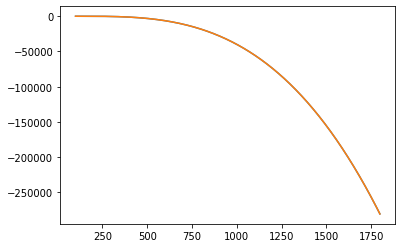

In [43]:
band90_3g = UnivariateSpline(freq90, band90, s=0)
plt.plot(freq, band90_f(freq))
plt.plot(freq, band90_3g(freq))

In [44]:
quad(lambda freq: sptsz, 66.03, 124.07)[0]
quad(lambda freq: spt3g, 66.03, 124.07)[0]

TypeError: only size-1 arrays can be converted to Python scalars

In [59]:
fsolve(dB_dT_over_f_dust, 90, args = ratio_dust_90)[0]

110.74999745584489

In [2]:
sn_mean_250 = [12.78706332, 15.4664692, 23.24715604, 29.74515403, 34.65076565, 49.00014894, 50.63657786, 46.80694417, 45.19015036, 45.25721638]
sn_mean_350 = [12.23259136, 9.56779434, 17.55339141, 27.52038489, 36.38469991, 39.77758333, 30.83732091, 37.93960684, 33.1870655, 43.00010261]
sn_mean_500 = [10.45081109, 9.72582282, 11.23352434, 16.05041121, 13.37246757, 22.141933, 21.27238323, 20.97544416, 33.30629623, 33.29477236]

sn_med_250 = [2.77215846, 0.09679803, 8.34922035, 11.21886663, 16.79152909, 22.7664257, 23.2727591, 20.82713192, 21.6894594, 25.36456864]
sn_med_350 = [0.42523644, 0.31291164, 1.62910677, 10.7326223, 15.357216487, 20.60656522, 14.92867958, 18.6291745, 16.93942547, 23.36039118 ]
sn_med_500 = [2.40783475, -1.81996852, 0.12655513, 2.87435192, 2.6269551, 9.25878599, 7.11004724, 6.24725359, 13.59878177, 14.04715577]
Nobj = [6490,9644,13597,17459,19839,20779,22149,22722,21582,17819]
sm_bins = np.arange(9.0,10.8,0.2)
print (len(sm_bins), len(Nobj))

10 10


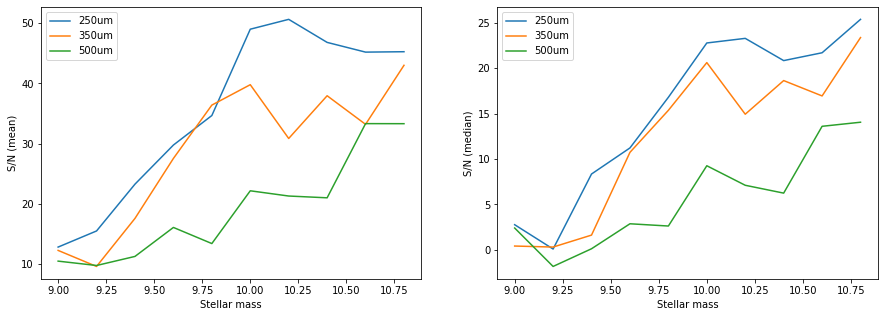

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(sm_bins, sn_mean_250,label='250um')
plt.plot(sm_bins, sn_mean_350,label='350um')
plt.plot(sm_bins, sn_mean_500,label='500um')
plt.xlabel('Stellar mass')
plt.ylabel('S/N (mean)')
plt.legend(loc='best')
plt.subplot(1,2,2)
plt.plot(sm_bins, sn_med_250,label='250um')
plt.plot(sm_bins, sn_med_350,label='350um')
plt.plot(sm_bins, sn_med_500,label='500um')
plt.xlabel('Stellar mass')
plt.ylabel('S/N (median)')
plt.legend(loc='best')

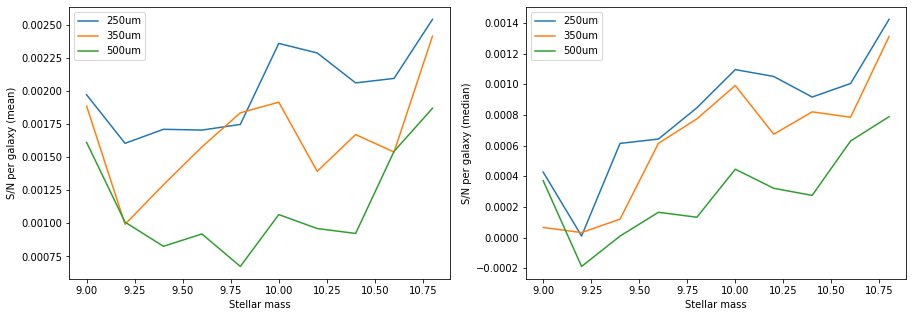

In [10]:
sn_mean_250 = np.asarray(sn_mean_250)
sn_mean_350 = np.asarray(sn_mean_350)
sn_mean_500 = np.asarray(sn_mean_500)

sn_med_250 = np.asarray(sn_med_250)
sn_med_350 = np.asarray(sn_med_350)
sn_med_500 = np.asarray(sn_med_500)

Nobj = np.asarray(Nobj)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(sm_bins, sn_mean_250/Nobj,label='250um')
plt.plot(sm_bins, sn_mean_350/Nobj,label='350um')
plt.plot(sm_bins, sn_mean_500/Nobj,label='500um')
plt.xlabel('Stellar mass')
plt.ylabel('S/N per galaxy (mean)')
plt.legend(loc='best')
plt.subplot(1,2,2)
plt.plot(sm_bins, sn_med_250/Nobj,label='250um')
plt.plot(sm_bins, sn_med_350/Nobj,label='350um')
plt.plot(sm_bins, sn_med_500/Nobj,label='500um')
plt.xlabel('Stellar mass')
plt.ylabel('S/N per galaxy (median)')
plt.legend(loc='best')